In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [3]:
data=pd.read_csv("Q.3-data.csv")

C:\Users\Ayush\AppData\Local\Temp\ipykernel_16840\996543810.py:1: DtypeWarning: Columns (17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32) have mixed types. Specify dtype option on import or set low_memory=False.
  data=pd.read_csv("Q.3-data.csv")


In [4]:
data.sample(10)

,ement and health insurance programs,they need to take an alternate position in the chain of command. We need to transition back to a system where the physician and patient are at the â€˜topâ€™ and the rest follows. Too often we see insurances denying the care that is prescribed by a physician,but if this recommendation is being made with the patientâ€™s well-being in mind,then why are these organizations getting the final say on if this treatment happens or not. As stated before,we need to change the current hierarchy of the healthcare system to restore physician autonomy. The demands of doing more in less time need to end. Physicians need to stop being asked to,â€œdo more and more in less and less time.â€ They need to be able to take the time with their patients to be first â€œa relatable personâ€ and â€œa doctor second.â€ By doing so as Dr. Orsini mentions,â€œrapport is built,and trust will follow.â€ This is the concept that medicine needs to be built upon and significant change needs to be made for the current medical system to get to this point.,Unnamed: 8,Unnamed: 9,...,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32
32285,@Christine-wi1dl - Thank you SO very Much for ...,I had forgotten all of these important ways t...,and so,so,so badly needed here. I've read so many self-...,been to so many individual counselling sessio...,and seen so many different counsellors off an...,no one ever explained anything that I really ...,as clearly as you do!!!! Thank you for being ...,and I am especially grateful for your consist...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35298,Me:goes to look for my dog so I can play with it,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11950,@thesudaneseprince9675 - This seems pretty awe...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
694,Ltlickme: aight ima head out since yâ€™all don...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
37708,@aanshikam4921 - My age : 17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23504,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22465,@laubowiebass - I listened to the full episode...,it took me a few minutes to get engaged. Once...,I listened to all of it while driving and it ...,the details you shared as examples,and I look forward to the rest !,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11731,@abdulrahmanradwan6167 - O I am studying publi...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31514,@magdalenogarcia203 - I have been battling wit...,I have since listened to a lot of folks talk ...,I have suffered a number of injuries over tho...,well now with all my injuries I can no longer...,I can still walk and I can still move. Thank ...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32439,@MaryDzohara - Wonderful! An A speech. It woul...,the world indeed would be different. I hope e...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df = pd.DataFrame({'comments': data.apply(lambda row: ' '.join(row.dropna().astype(str)), axis=1)})

df['username'] = df['comments'].apply(lambda x: x.split(' ', 1)[0])
df['comments'] = df['comments'].apply(lambda x: x.split(' ', 1)[-1].strip())

In [6]:
df.head()

,comments,username
0,- Dr. Orsini has been working with healthcare ...,@theorsiniway1938
1,- This doctors words - his lessons - should be...,@bleugh9451
2,- The story about the baby passing really stop...,@jessettucker
3,- Many many of us have had the experience of n...,@channelcannes
4,- Dr. Orsini discusses a fundamental part of h...,@user-mv6bi4tr1w


First knowing about the data

In [7]:
print(df.describe())
print(df.info())

       comments username
count     43103    43103
unique    34277    31752
top                     
freq       1053     1270
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43103 entries, 0 to 43102
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   comments  43103 non-null  object
 1   username  43103 non-null  object
dtypes: object(2)
memory usage: 673.6+ KB
None


In [8]:
print(df.isnull().sum())
df_cleaned = df.dropna()

comments    0
username    0
dtype: int64


### Data cleaning

In [9]:
!pip install emoji

#### removing emojis

In [10]:
import re
emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  
        u"\U0001F300-\U0001F5FF" 
        u"\U0001F680-\U0001F6FF"  
        u"\U0001F1E0-\U0001F1FF" 
                           "]+", flags=re.UNICODE)
df['comments'] = df['comments'].apply(lambda x: emoji_pattern.sub(r'', x))



#### removing links

In [11]:
import re
df['comments'] = df['comments'].apply(lambda x: re.sub(r'[^\w\s]', '', x))

In [12]:
# Text Preprocessing
def preprocess_text(text):
    # Remove special characters and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Convert to lowercase
    text = text.lower()
    return text

df['comments'] = df['comments'].apply(preprocess_text)

In [13]:
df.head()

,comments,username
0,dr orsini has been working with healthcare pr...,@theorsiniway1938
1,this doctors words his lessons should be sh...,@bleugh9451
2,the story about the baby passing really stopp...,@jessettucker
3,many many of us have had the experience of no...,@channelcannes
4,dr orsini discusses a fundamental part of hea...,@user-mv6bi4tr1w


In [57]:
!pip install WordCloud

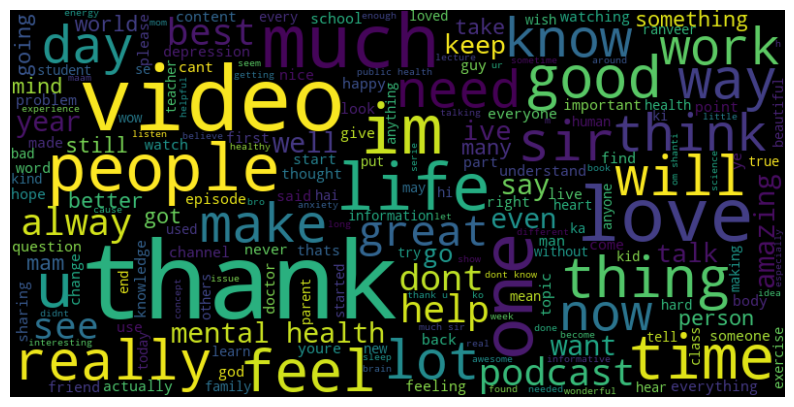

In [14]:
from wordcloud import WordCloud
all_comments = ' '.join(df['comments'])
wordcloud = WordCloud(width=800, height=400, random_state=21, max_font_size=110).generate(all_comments)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [45]:
!pip install nltk
!pip install TextBlob

     ---------------------------------------- 0.0/636.8 kB ? eta -:--:--
     - ------------------------------------- 30.7/636.8 kB 1.4 MB/s eta 0:00:01
     ----- --------------------------------- 92.2/636.8 kB 1.1 MB/s eta 0:00:01
     ------------- ------------------------ 225.3/636.8 kB 1.7 MB/s eta 0:00:01
     ----------------- -------------------- 297.0/636.8 kB 1.7 MB/s eta 0:00:01
     ------------------------ ------------- 409.6/636.8 kB 2.0 MB/s eta 0:00:01
     ------------------------------------ - 604.2/636.8 kB 2.2 MB/s eta 0:00:01
     -------------------------------------- 636.8/636.8 kB 2.1 MB/s eta 0:00:00


In [15]:
from nltk.corpus import stopwords
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer

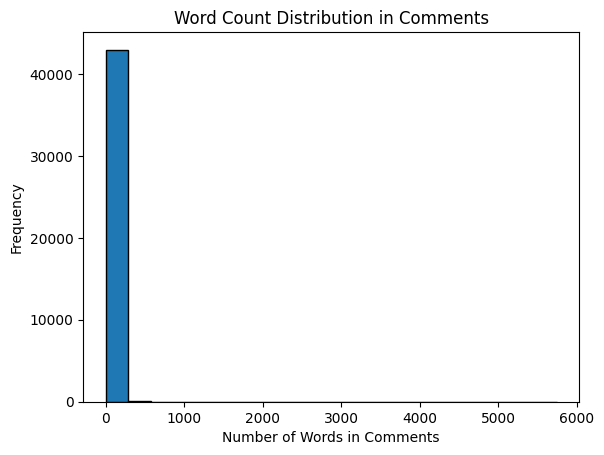

In [16]:
# Word Frequency Analysis
stop_words = set(stopwords.words('english'))
df['word_count'] = df['comments'].apply(lambda x: len(re.findall(r'\b\w+\b', x.lower())))
df['word_count'].hist(bins=20, edgecolor='black', grid=False)
plt.xlabel('Number of Words in Comments')
plt.ylabel('Frequency')
plt.title('Word Count Distribution in Comments')
plt.show()

from above plot we can see the almost all the data comments is around 2000-3000 words

## Sentiment Analysis

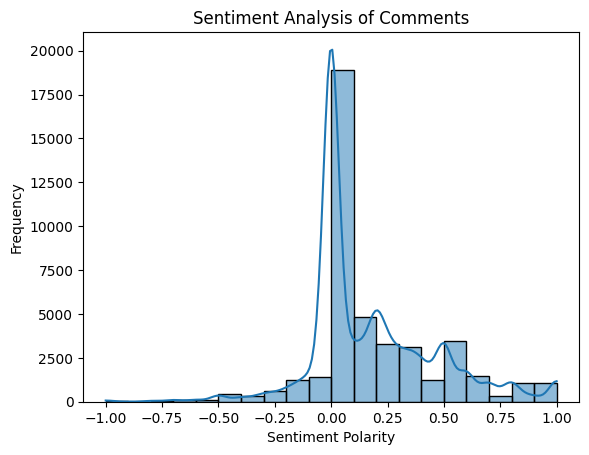

In [17]:
df['sentiment'] = df['comments'].apply(lambda x: TextBlob(x).sentiment.polarity)
sns.histplot(df['sentiment'], bins=20, kde=True)
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.title('Sentiment Analysis of Comments')
plt.show()

### Topic Modeling (using CountVectorizer for simplicity)

I am using here countVectorizer just for EDA purpose for modeling as stated in question i will use tf-idf
And here i am assuming max_features to be 10

I forgot to remove the stopwrods so i am removing them here.

In [18]:
X = df['comments'].head(1000)
vectorizer = CountVectorizer(max_features=500, stop_words=['of', 'both', 't', 'my', 'her', 'there', 'nor', 'because', 'if', 'i', 'why', 'haven', 'hers', 'd', 'am', 'few', 'in', "you're", 'who', 'against', 'or', "won't", 'did', 'over', 'your', 'does', 'wasn', 'its', 'further', 'ours', 'those', 'wouldn', 'hadn', 'any', 'not', 'was', 'ourselves', 'you', "weren't", "aren't", 'most', 'itself', "doesn't", 'whom', 'myself', 'other', 'herself', 've', 'what', 'it', 'under', 'after', 'shan', 'him', 'will', "mustn't", 'too', 'so', "mightn't", 'into', 'during', 's', 'aren', 'me', 'then', 'has', 'up', 'all', 'being', 'until', "wasn't", "couldn't", "hasn't", 'doing', 'each', 'weren', 'where', 'at', 'how', 'have', 'off', 'are', 'which', 'himself', 'he', 'to', "don't", 'own', 'ain', 'do', 'only', "wouldn't"])
X_counts = vectorizer.fit_transform(X)
terms = vectorizer.get_feature_names_out() 

topic_df = pd.DataFrame(X_counts.toarray(), columns=terms)
topic_df.index = df['username'].head(1000)

plt.figure(figsize=(12, 8))
sns.heatmap(topic_df, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Topics')
plt.ylabel('Usernames')
plt.title('Term Counts in Comments (First 1000 Rows)')
plt.show()

c:\Users\Ayush\apython\envs\tf\lib\site-packages\sklearn\feature_extraction\text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['couldn', 'doesn', 'don', 'hasn', 'mightn', 'mustn', 're', 'won'] not in stop_words.
  warnings.warn(


KeyboardInterrupt: 

In [1]:
plt.figure(figsize=(12, 6))
bar_width = 0.2
bar_positions = np.arange(len(topic_df.columns))

for i, username in enumerate(topic_df.index):
    plt.bar(bar_positions + i * bar_width, topic_df.loc[username], bar_width, label=username)

plt.xlabel('Terms')
plt.ylabel('Count')
plt.title('Term Frequency by Username')
plt.xticks(bar_positions + bar_width, topic_df.columns, rotation='vertical')
plt.legend()
plt.show()

NameError: name 'plt' is not defined

##### As we already see above the word frequency but it is not giving us any idea about health related issues or diseases so i have to use another approach to have a idea about our data's most related words to these issues on which are doing modelling.

So first i am using word2vec model . There are better model than this but i will use this one first.

In [68]:
!pip install gensim

In [69]:
import gensim
from gensim.models import Word2Vec
from nltk.corpus import stopwords

In [75]:
df.head()

,comments,username,word_count,sentiment,dominant_topic,tokens
0,dr orsini has been working with healthcare pr...,@theorsiniway1938,70,0.220000,0,"[dr, orsini, working, healthcare, providers, t..."
1,this doctors words his lessons should be sh...,@bleugh9451,20,0.246429,0,"[doctors, words, lessons, shared, entire, medi..."
2,the story about the baby passing really stopp...,@jessettucker,24,0.066667,1,"[story, baby, passing, really, stopped, cold, ..."
3,many many of us have had the experience of no...,@channelcannes,24,0.500000,0,"[many, many, us, experience, heard, feeling, r..."
4,dr orsini discusses a fundamental part of hea...,@user-mv6bi4tr1w,190,0.141071,0,"[dr, orsini, discusses, fundamental, part, hea..."


In [74]:
# Text Preprocessing
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text)  
    text = text.lower()
    tokens = [word for word in text.split() if word not in stop_words] 
    return tokens

df['tokens'] = df['comments'].apply(preprocess_text)

In [77]:
model = Word2Vec(sentences=df['tokens'], vector_size=100, window=5, min_count=1, workers=4)

def get_all_related_words(terms, model, topn=5):
    all_related_words = {}
    for term in terms:
        try:
            related_words = model.wv.most_similar(term, topn=topn)
            all_related_words[term] = [word for word, _ in related_words]
        except KeyError:
            print(f"Word '{term}' not present in vocabulary.")
            all_related_words[term] = []
    return all_related_words

terms_to_check = ['diseases', 'symptoms', 'health', 'healthcare']
all_related_words = get_all_related_words(terms_to_check, model)

# Print all related words
for term, related_words in all_related_words.items():
    print(f"Words most related to '{term}': {related_words}")


Words most related to 'diseases': ['destroy', 'function', 'disease', 'factors', 'concerns']
Words most related to 'symptoms': ['medication', 'disorder', 'bipolar', 'adhd', 'allowed']
Words most related to 'health': ['illnesses', 'toughness', 'wellbeing', 'illness', 'hygiene']
Words most related to 'healthcare': ['practices', 'condition', 'terms', 'plays', 'linked']


#### Now after eda our question says to identify major categories of health problems

For this i can use lda model to look how many dominant topics are there in our corpus

In [62]:
from sklearn.decomposition import LatentDirichletAllocation 

In [63]:
lda_model = LatentDirichletAllocation(n_components=2, random_state=42)
lda_topic_matrix = lda_model.fit_transform(X)

df['dominant_topic'] = lda_topic_matrix.argmax(axis=1)

# 

In [64]:
df.head()

,comments,username,word_count,sentiment,dominant_topic
0,dr orsini has been working with healthcare pr...,@theorsiniway1938,70,0.220000,0
1,this doctors words his lessons should be sh...,@bleugh9451,20,0.246429,0
2,the story about the baby passing really stopp...,@jessettucker,24,0.066667,1
3,many many of us have had the experience of no...,@channelcannes,24,0.500000,0
4,dr orsini discusses a fundamental part of hea...,@user-mv6bi4tr1w,190,0.141071,0


In [65]:
df['dominant_topic'].value_counts()

dominant_topic
0    31938
1    11165
Name: count, dtype: int64

So lda model identified two major groups in our corpus

##### Now using  tf-idf scheme as it is involved as a feature extractor for the purpose of classification, where the Logistic regression is to be employed for classification, which aims to predict classes for unseen data.

In [84]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

In [88]:
df.shape

(43103, 7)

#### First i am using tf-idf+ kmeans to cluster the data as there is noo label and giving a new dataframe to the df as <color='pink' cluster> and then i will use logistic regreesion on left data to check that labels are correct or not

In [115]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf_vectorizer.fit_transform(df['comments'])

# K-Means Clustering
num_clusters = 2 
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df['cluster'] = kmeans.fit_predict(X_tfidf)

c:\Users\Ayush\apython\envs\tf\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [122]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=2, random_state=42)
X_tfidf_2d = svd.fit_transform(X_tfidf)

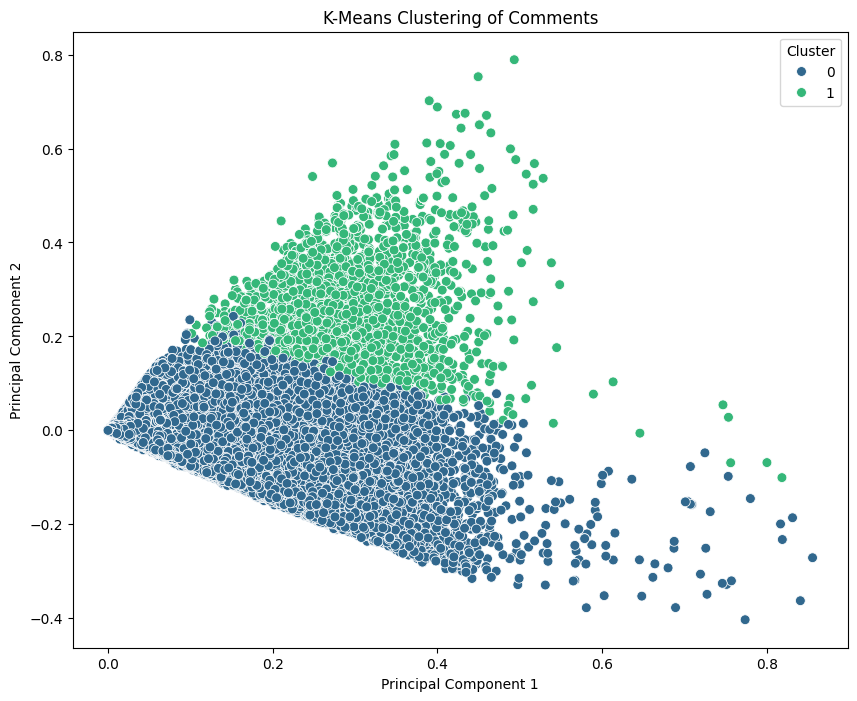

In [123]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_tfidf_2d[:, 0], y=X_tfidf_2d[:, 1], hue=df['cluster'], palette='viridis', s=50)
plt.title('K-Means Clustering of Comments')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

In [119]:
df['cluster'].value_counts()

cluster
0    39939
1     3164
Name: count, dtype: int64

In [98]:
df.tail(10)

,comments,username,word_count,sentiment,dominant_topic,tokens,cluster
43093,wow that truly was amazing thanks for sharin...,@lydiabarragan7106,22,0.280000,1,"[wow, truly, amazing, thanks, sharing, inspiri...",1
43094,this was probably the best ted talk ive ever ...,@gargos25,10,1.000000,1,"[probably, best, ted, talk, ive, ever, heard]",1
43095,had to watch this for my university level com...,@MacabreMary,43,0.372222,0,"[watch, university, level, communications, cla...",1
43096,i discovered this on accident it was not an a...,@qualitycrazy5516,87,0.068090,0,"[discovered, accident, accident, needed, hear,...",1
43097,i started watching this video right after rea...,@luisuribe8244,55,0.118594,0,"[started, watching, video, right, really, bad,...",1
43098,i also watched your another video how to fix ...,@rozy9335,60,0.075000,1,"[also, watched, another, video, fix, broken, h...",1
43099,love the calm tone of his voice learing to co...,@ChristianHoyle,20,0.700000,0,"[love, calm, tone, voice, learing, control, th...",1
43100,what an incredibly powerful talk being your o...,@OurBlindSpot,19,0.475000,0,"[incredibly, powerful, talk, best, friend, emo...",2
43101,thats true we look after our physical appeara...,@sakshiaggarwal6199,46,0.055556,0,"[thats, true, look, physical, appearance, heal...",1
43102,this was a very good short easy listen it has...,@delcreates,35,0.348667,0,"[good, short, easy, listen, much, knowledge, i...",1


##### Now i will use logistic regression to evaluate the cluster 
i am just using randow 1000 rows for this

In [ ]:
logistic_regression = LogisticRegression()
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, df['cluster'].iloc[0:1000], test_size=0.2, random_state=42)

logistic_regression.fit(X_train, y_train)

y_pred = logistic_regression.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)


Accuracy: 1.00


In [20]:
print(f"Accuracy: {accuracy:.9f}")

Accuracy: 0.998000000


In [127]:
print("\nConfusion Matrix:")
print(conf_matrix)



Confusion Matrix:
[[8013    1]
 [  32  575]]


In [108]:
print("\nClassification Report:")
print(classification_rep)


Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.94      0.96       569
           1       0.98      0.98      0.98      3265
           2       0.99      0.99      0.99      4787

    accuracy                           0.98      8621
   macro avg       0.98      0.97      0.98      8621
weighted avg       0.98      0.98      0.98      8621



In [134]:
df.sample(5)

,comments,username,word_count,sentiment,dominant_topic,tokens,cluster
40309,good evening dear sir ji sir aap ki tarif ki...,@sadhanarawat3671,58,0.250000,1,"[good, evening, dear, sir, ji, sir, aap, ki, t...",0
15094,wow brilliant talk thank you,@e-js2731,5,0.500000,1,"[wow, brilliant, talk, thank]",1
10718,omg the nurse is such a hero,@bubbl3blush81,7,0.000000,0,"[omg, nurse, hero]",0
11872,good very good very,@SaadSaad-mb4py,4,0.603333,0,"[good, good]",0
37819,i guess this answers my question to why my fri...,,13,-0.800000,0,"[guess, answers, question, friends, annoying]",0
